In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='kermany.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('kermany.zip')
f.keys()
!unzip "kermany"

Streaming output truncated to the last 5000 lines.
  inflating: kermany/train/NORMAL/NORMAL-8050269-6_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050269-7_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050269-8_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050636-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050636-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055145-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055145-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055145-3_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055590-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055590-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055590-3_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-3_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-4_aug_0.jpg  
  in

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf


BATCH_SIZE = 32
IMG_SIZE = (224, 224)


dataset_directory = '/content/kermany/train'
test_dataset = '/content/kermany/test'



train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,
    subset="training",
    seed = 66
)


validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,
    subset="validation" ,
    seed= 66
)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dataset,
                                                                 shuffle=True,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE)


Found 83484 files belonging to 4 classes.
Using 66788 files for training.
Found 83484 files belonging to 4 classes.
Using 16696 files for validation.
Found 968 files belonging to 4 classes.


In [ ]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
base_model.trainable = True

In [ ]:
set_trainable = False

for layer in base_model.layers:
  if layer.name == 'conv5_block1_preact_bn':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name, " == ", layer.trainable)

input_1  ==  False
conv1_pad  ==  False
conv1_conv  ==  False
pool1_pad  ==  False
pool1_pool  ==  False
conv2_block1_preact_bn  ==  False
conv2_block1_preact_relu  ==  False
conv2_block1_1_conv  ==  False
conv2_block1_1_bn  ==  False
conv2_block1_1_relu  ==  False
conv2_block1_2_pad  ==  False
conv2_block1_2_conv  ==  False
conv2_block1_2_bn  ==  False
conv2_block1_2_relu  ==  False
conv2_block1_0_conv  ==  False
conv2_block1_3_conv  ==  False
conv2_block1_out  ==  False
conv2_block2_preact_bn  ==  False
conv2_block2_preact_relu  ==  False
conv2_block2_1_conv  ==  False
conv2_block2_1_bn  ==  False
conv2_block2_1_relu  ==  False
conv2_block2_2_pad  ==  False
conv2_block2_2_conv  ==  False
conv2_block2_2_bn  ==  False
conv2_block2_2_relu  ==  False
conv2_block2_3_conv  ==  False
conv2_block2_out  ==  False
conv2_block3_preact_bn  ==  False
conv2_block3_preact_relu  ==  False
conv2_block3_1_conv  ==  False
conv2_block3_1_bn  ==  False
conv2_block3_1_relu  ==  False
conv2_block3_2_pad  =

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/100
2088/2088 [==============================] - 327s 151ms/step - loss: 0.4292 - accuracy: 0.8844 - val_loss: 0.2681 - val_accuracy: 0.9149
Epoch 2/100
2088/2088 [==============================] - 351s 168ms/step - loss: 0.1884 - accuracy: 0.9398 - val_loss: 0.2600 - val_accuracy: 0.9300
Epoch 4/100
2088/2088 [==============================] - 353s 169ms/step - loss: 0.1544 - accuracy: 0.9514 - val_loss: 0.2953 - val_accuracy: 0.9287
Epoch 5/100
2088/2088 [==============================] - 314s 150ms/step - loss: 0.1287 - accuracy: 0.9597 - val_loss: 0.3391 - val_accuracy: 0.9292
Epoch 6/100
2088/2088 [==============================] - 352s 169ms/step - loss: 0.1036 - accuracy: 0.9673 - val_loss: 0.3593 - val_accuracy: 0.9261
Epoch 7/100
2088/2088 [==============================] - 352s 168ms/step - loss: 0.0865 - accuracy: 0.9725 - val_loss: 0.4240 - val_accuracy: 0.9299


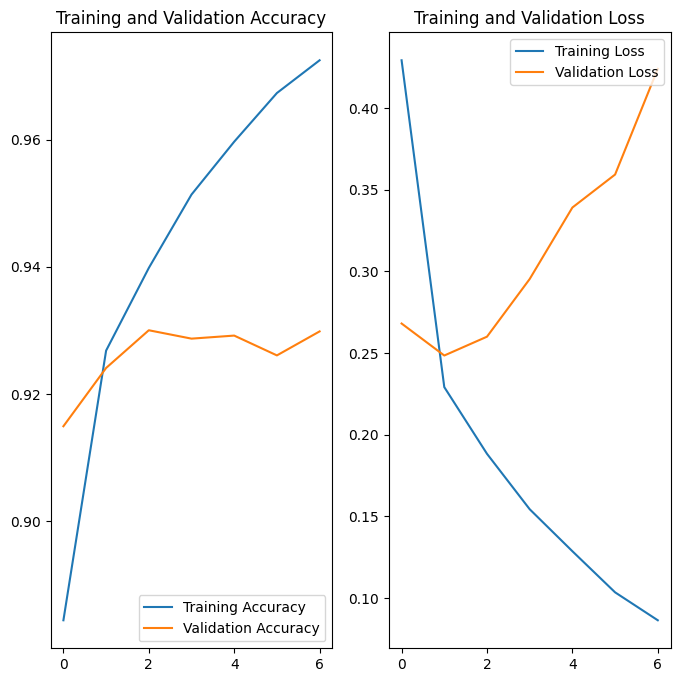

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(7), acc, label='Training Accuracy')
plt.plot(range(7), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(7), loss, label='Training Loss')
plt.plot(range(7), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_dataset.map(process)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


31/31 [==============================] - 4s 125ms/step - loss: 0.0450 - accuracy: 0.9835
Test Loss: 0.0450
Test Accuracy: 0.9835


In [ ]:
class_names = validation_dataset.class_names

1/1 [==============================] - 0s 23ms/step


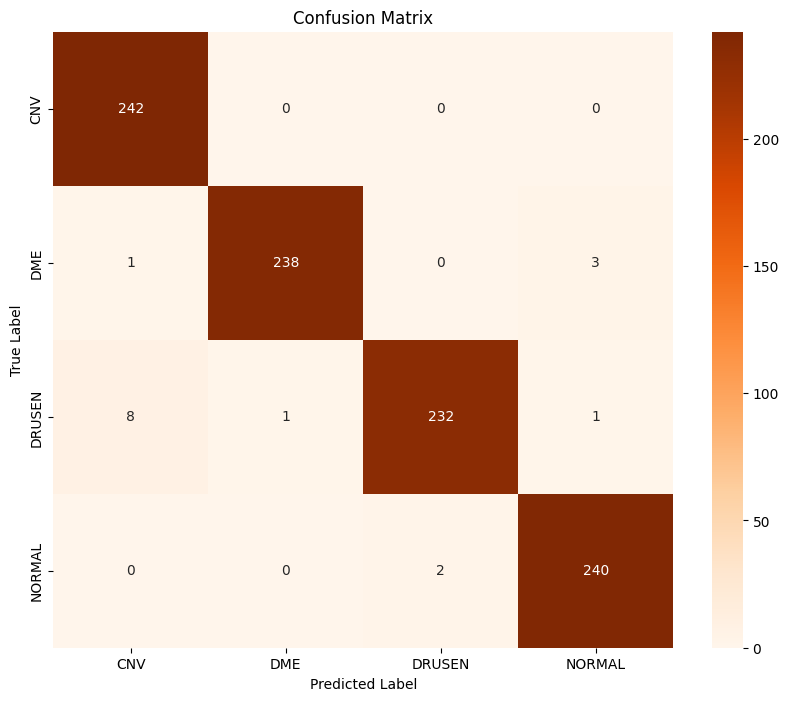

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


true_labels = []
predicted_labels = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())


cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

1/1 [==============================] - 0s 46ms/step
F1 Score: 0.9834484121164311
Precision: 0.9837547186766129
Recall: 0.9834710743801653
ROC-AUC Score: 0.9997709059035129
Class 0 - Precision: 0.9641434262948207, Recall: 1.0, F1-Score: 0.9817444219066938, ROC-AUC: 0.9998178630785693
Class 1 - Precision: 0.99581589958159, Recall: 0.9834710743801653, F1-Score: 0.9896049896049897, ROC-AUC: 0.999960157548437
Class 2 - Precision: 0.9914529914529915, Recall: 0.9586776859504132, F1-Score: 0.9747899159663866, ROC-AUC: 0.999413746784145
Class 3 - Precision: 0.9836065573770492, Recall: 0.9917355371900827, F1-Score: 0.9876543209876544, ROC-AUC: 0.9998918562029006


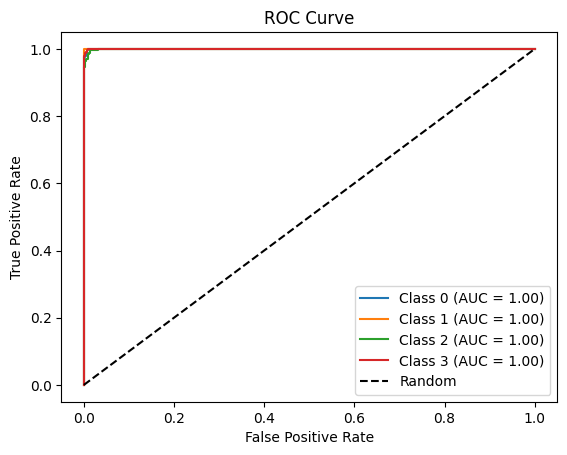

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a validation_dataset
test_ds = test_ds.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in test_ds:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Calculate precision, recall, F1-score, and ROC-AUC score for each class
precision_per_class = precision_score(y_true, y_pred_classes, average=None)
recall_per_class = recall_score(y_true, y_pred_classes, average=None)
f1_per_class = f1_score(y_true, y_pred_classes, average=None)

roc_auc_per_class = []
for i in range(y_pred.shape[1]):
    roc_auc_per_class.append(roc_auc_score(y_true == i, y_pred[:, i]))

# Print metrics for each class
for i in range(y_pred.shape[1]):
    print(f"Class {i} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}, F1-Score: {f1_per_class[i]}, ROC-AUC: {roc_auc_per_class[i]}")

# Plot ROC curves
plt.figure()
for i in range(y_pred.shape[1]):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
